Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [237]:
NAME = "Anjana Tissera"
ID = "st123459"

---

# Lab 03: Logistic Regression

Thus far, the problems we've encountered have been *regression* problems, in which the target $y \in \mathbb{R}$.

Today we'll start experimenting with *classification* problems, beginning with *binary* classification problems, in which the target $y \in \{ 0, 1 \}$.

## Background

The simplest approach to classification, applicable when the input feature vector $\mathbf{x} \in \mathbb{R}^n$, is a simple generalization of what we
do in linear regression. Recall that in linear regression, we assume that the target is drawn from a Gaussian distribution whose mean is a linear function
of $\mathbf{x}$:

$$ y \sim {\cal N}(\theta^\top \mathbf{x}, \sigma^2) $$

In logistic regression, similarly, we'll assume that the target is drawn from a Bernoulli distribution with parameter $p$ being the probability of
class 1:

$$ y \sim \text{Bernoulli}(p) $$

That's fine, but how do we model the parameter $p$? How is it related to $\mathbf{x}$?

In linear regression, we assume that the mean of the Gaussian is $\theta^\top \mathbf{x}$, i.e., a linear function of $\mathbf{x}$.

In logistic regression, we'll assume that $p$ is a "squashed" linear function of $\mathbf{x}$, i.e.,

$$ p = \text{sigmoid}(\theta^\top \mathbf{x}) = g(\theta^\top \mathbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}} $$

Later, when we introduce generalized linear models, we'll see why $p$ should take this form. For now, though, we can simply note that the selection makes
sense. Since $p$ is a discrete probability, $p$ is bounded by $0 \le p \le 1$. The sigmoid function $g(\cdot)$ conveniently obeys these bounds:


In [238]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

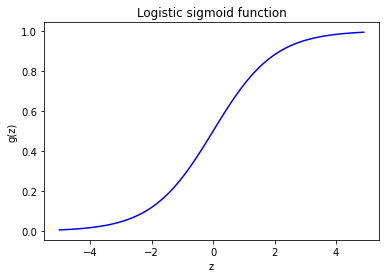

In [239]:
z = np.arange(-5, 5, 0.1)
plt.plot(z, sigmoid(z), 'b-')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Logistic sigmoid function')
plt.show()

We see that the sigmoid approaches 0 as its input approaches $-\infty$ and approaches 1 as its input approaches $+\infty$. If its input is 0, its value is 0.5.

Again, this choice of function may seem strange at this point, but bear with it! We'll derive this function from a more general principle, the generalized
linear model, later.

OK then, we now understand that for logistic regression, the assumptions are:

1. The *data* are pairs $(\textbf{x}, y) \in \mathbb{R}^n \times \{ 0, 1 \}$.
1. The *hypothesis function* is $h_\theta(\textbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}$.

What else do we need... ? A cost function and an algorithm for minimizing that cost function!

## Cost function for logistic regression

You can refer to the lecture notes to see the derivation, but for this lab, let's just skip to the chase.
With the hypothesis $h_\theta(\mathbf{x})$ chosen as above, the log likelihood function $\ell(\theta)$ can be derived as
$$ \ell(\theta) = \log {\cal L}(\theta) =  \sum_{i=1}^{m}y^{(i)}\log(h_{\theta}(\mathbf{x}^{(i)})) + (1 - y^{(i)})\log(1 - (h_{\theta}(\mathbf{x}^{(i)})) .$$

Negating the log likelihood function to obtain a loss function, we have

$$ J(\theta) = - \sum_{i=1}^m y^{(i)}\log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-h_\theta(\textbf{x}^{(i)})) .$$

There is no closed-form solution to this problem like there is in linear regression, so we have to use gradient descent to find $\theta$ minimizing $J(\theta)$.
Luckily, the function *is* convex in $\theta$ so there is just a single global minimum, and gradient descent is guaranteed to get us there eventually if we take
the right step size.

The *stochastic* gradient of $J$, for a single observed pair $(\mathbf{x}, y)$, turns out to be (see lecture notes)

$$\nabla_J(\theta) = (h_\theta(\mathbf{x}) - y)\mathbf{x} .$$

Give some thought as to whether following this gradient to increase the loss $J$ would make a worse classifier, and vice versa!

Finally, we obtain the update rule for the $j^{th}$ iteration selecting training pattern $i$:

$$ \theta^{(j+1)} \leftarrow \theta^{(j)} + \alpha(y^{(i)} - h_\theta(\textbf{x}^{(i)}))\textbf{x}^{(i)} .$$ 

Note that we can perform *batch gradient descent* simply by summing the single-pair gradient over the entire training set before taking a step,
or *mini-batch gradient descent* by summing over a small subset of the data.

## Example dataset 1: student admissions data

This example is from Andrew Ng's machine learning course on Coursera.

The data contain students' scores for two standardized tests and an admission decision (0 or 1).


In [240]:
# Load student admissions data.
data = np.loadtxt('ex2data1.txt',delimiter = ',')
exam1_data = data[:,0]
exam2_data = data[:,1]
X = np.array([exam1_data, exam2_data]).T
y = data[:,2]

# Output some sample data

print('Exam scores', X[0:5,:])
print('-----------------------------')
print('Admission decision', y[0:5])

Exam scores [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
-----------------------------
Admission decision [0. 0. 0. 1. 1.]


Let's plot the data...

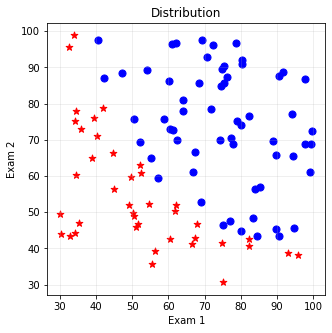

In [241]:
# Plot the data
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5, 5)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Distribution')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(exam1_data[idx_0], exam2_data[idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(exam1_data[idx_1], exam2_data[idx_1], s=50, c='b', marker='o', label='Admitted')
plt.show()

Let's see if we can find good values for $\theta$ without normalizing the data.
We will definitely want to split the data into train and test, however...

In [242]:
import random
random.seed(12)

# Partion data into training and test datasets
m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

### All important functions are here
- Sigmoid function
- Hypothesis function
- Gradient function
- Cost $j$ and gradient function

In [243]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

### Initialize theta

In [244]:
# Get a feel for how h works
theta_initial = np.zeros((n+1, 1))

print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', y[0:5,:])

Initial theta: [[0.]
 [0.]
 [0.]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Batch training function for num_iters iterations

In [245]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad #Here grad is negative thus addition
        j_history.append(cost)
    return theta, j_history

### Train data

In [246]:
# Train for 3000 iterations on full training set
alpha = .0005
num_iters = 1000000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[-11.29380461]
 [  0.10678604]
 [  0.07994591]]
Cost with optimized theta: 0.24972975869900046


In [247]:
theta_train1 = theta.copy()
theta_train1

array([[-11.29380461],
       [  0.10678604],
       [  0.07994591]])

### Plot graph

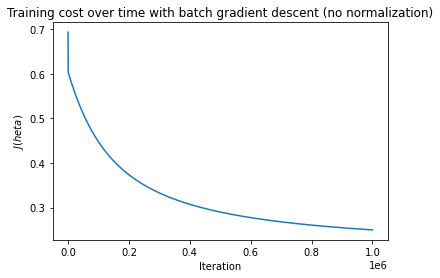

In [248]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### In-lab exercise from example 1 (Total 35 points)

That took a long time, right?

See if you can do better. 

1. Try increasing the learning rate $\alpha$ and starting with a better initial $\theta$. How much does it help?
   - Try at least 2 learning rate $\alpha$ with 2 difference $\theta$ (4 experiments)
   - Do not forget to plot the graph to compare youre results

2. Better yet, try *normalizing the data* and see if the training converges better. How did it go? 
   - Do not forget to plot the graph to compare youre results between unnormalized and normalized data.

3. Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.




### Exercise 1.1 (5 points)

Fill $\alpha$ and $\theta$

In [249]:
# grade task: change 'None' value to number(s) or function
# YOUR CODE HERE
# declare your alphas
alpha1 = .001
alpha2 = .005

# initialize thetas as you want
theta_initial1 = np.ones((n+1, 1))
                         
np.random.seed(10)                       
theta_initial2 = np.random.choice([0, 1], size=(n+1, 1), p=[0.5, 0.5])                         

# define your num iterations
num_iters = 1000000

In [250]:
alpha_list = [alpha1, alpha2]
print('alpha 1:', alpha1)
print('alpha 2:', alpha2)

theta_initial_list = [theta_initial1, theta_initial2]
print('theta 1:', theta_initial_list[0])
print('theta 2:', theta_initial_list[1])

print('Use num iterations:', num_iters)

# Test function: Do not remove
assert alpha_list[0] is not None and alpha_list[1] is not None, "Alpha has not been filled"
chk1 = isinstance(alpha_list[0], (int, float))
chk2 = isinstance(alpha_list[1], (int, float))
assert chk1 and chk2, "Alpha must be number"
assert theta_initial_list[0] is not None and theta_initial_list[1] is not None, "initialized theta has not been filled"
chk1 = isinstance(theta_initial_list[0], (list,np.ndarray))
chk2 = isinstance(theta_initial_list[1], (list,np.ndarray))
assert chk1 and chk2, "Theta must be list"
chk1 = ((n+1, 1) == theta_initial_list[0].shape)
chk2 = ((n+1, 1) == theta_initial_list[1].shape)
assert chk1 and chk2, "Theta size are incorrect"
assert num_iters is not None and isinstance(num_iters, int), "num_iters must be integer"
print("success!")
# End Test function

alpha 1: 0.001
alpha 2: 0.005
theta 1: [[1.]
 [1.]
 [1.]]
theta 2: [[1]
 [0]
 [1]]
Use num iterations: 1000000
success!


### Exercise 1.2 (5 points)

Train data

In [251]:
# grade task: change 'None, None' value to number(s) or function
j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
        theta_i, j_history_i = train(X_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)

/tmp/ipykernel_7110/4215336465.py:12: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
/tmp/ipykernel_7110/4215336465.py:12: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))


In [252]:
# Test function: Do not remove
assert theta_list[0] is not None and j_history_list[0] is not None, "No values in theta_list or j_history_list"
chk1 = isinstance(theta_list[0], (list,np.ndarray))
chk2 = isinstance(j_history_list[0][0], (int, float))
assert chk1 and chk2, "Wrong type in theta_list or j_history_list"
print("success!")
# End Test function

success!


### Exercise 1.3 (10 points)

Plot graph

In [253]:
legend_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        alpha_i = str(alpha)
        theta_i = ""
        for theta in theta_initial:
            theta_i += str(theta[0]) + ", "
        title_i = "alpha = " + alpha_i + ", theta = " + theta_i
        legend_list.append(title_i)  

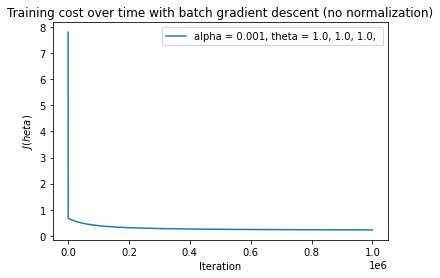

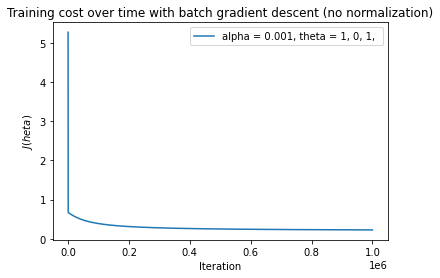

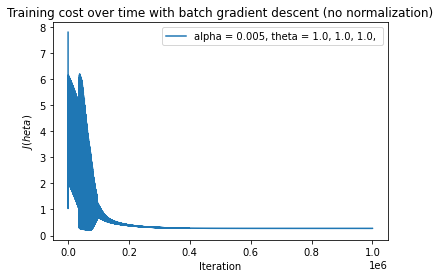

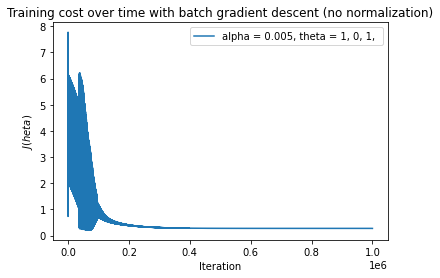

In [254]:
# YOUR CODE HERE
i = 0
for j_history in j_history_list:
    plt.plot(j_history)
    plt.xlabel("Iteration")
    plt.ylabel("$J(\theta)$")
    plt.title("Training cost over time with batch gradient descent (no normalization)")
    plt.legend([legend_list[i]])
    plt.show()
    i = i + 1

### Exercise 1.4 (10 points)

- Repeat your training, but **normalized data** before run training
- Compare the results between **normalized data** and **unnormalized data**

In [255]:
print('data')
print(data[0:3,:])

data
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]]


In [256]:
# Normalize the data
data_norm = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)

# Extract x and y
exam1_dat_norm = data_norm[:,0]
exam2_dat_norm = data_norm[:,1]
X_norm = np.array([exam1_dat_norm, exam2_dat_norm]).T
y1_norm = data_norm[:,2]

In [257]:
import random

# Split the dataset into trainning and testing samples

m, n = X_norm.shape
XX_norm = np.insert(X_norm, 0, 1, axis=1)
y1_norm = y1_norm.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train_norm = XX_norm[train_idx,:];
X_test_norm = XX_norm[test_idx,:];

y_train_norm = y[train_idx];
y_test_norm = y[test_idx];


In [258]:
alpha_list

[0.001, 0.005]

In [259]:
theta_initial_list

[array([[1.],
        [1.],
        [1.]]),
 array([[1],
        [0],
        [1]])]

In [260]:
# Training with normalized data
j_history_list_norm = []
theta_list_norm = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        theta_i, j_history_i = train(X_train_norm, y_train_norm, theta_initial, alpha, num_iters)
        j_history_list_norm.append(j_history_i)
        theta_list_norm.append(theta_i)

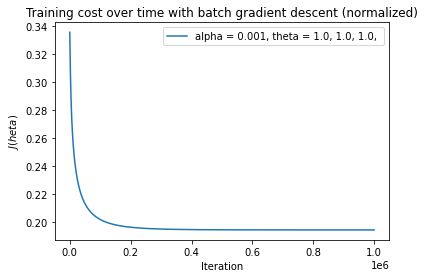

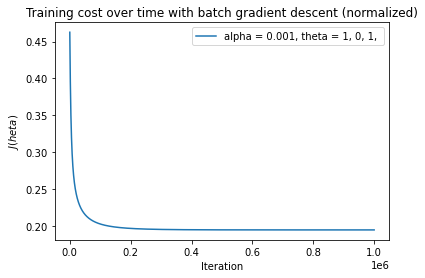

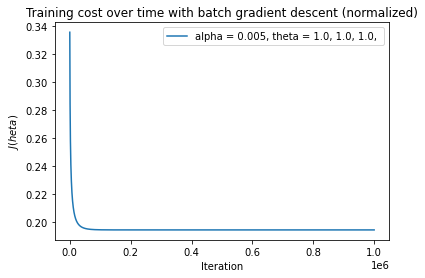

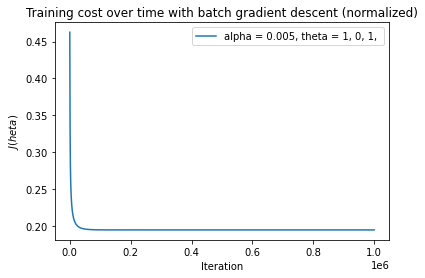

In [261]:
#Plotting the graphs
i = 0
for j_history in j_history_list_norm:
    plt.plot(j_history)
    plt.xlabel("Iteration")
    plt.ylabel("$J(\theta)$")
    plt.title("Training cost over time with batch gradient descent (normalized)")
    plt.legend([legend_list[i]])
    plt.show()
    i = i + 1

### Exercise 1.5 (5 points)

Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

### Answer:

- When data is not normalized, we can see large fluctuations in cost, especially when the learning rate is high (example: alpha = .005). Also when data is not normalized training functions results in "RuntimeWarning: divide by zero".

- When data is normalized, even with a higher learning rate(example: alpha = .005) the cost converges smoothly and does not result in runtime warnings.


### Decision boundary

Note that when $\theta^\top \textbf{x} = 0$, we have $h_\theta(\textbf{x}) = 0.5$. That is, we are
equally unsure as to whether $\textbf{x}$ belongs to class 0 or class 1. The contour at which
$h_\theta(\textbf{x}) = 0.5$ is called the classifier's *decision boundary*.

We know that in the plane, the equation $$ax+by+c=0$$ is the general form of a 2D line. In our case, we have
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ as our decision boundary, but clearly, this is just a 2D line
in the plane. So when we plot $x_1$ against $x_2$, it is easy to plot the boundary line.

In [262]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

In [263]:
#NOTE: theta_train1 is a copy of theta values form the 1st training
#      theta_train1 is used to plot the boundary line
print('theta_train1')
print(theta_train1)

theta_train1
[[-11.29380461]
 [  0.10678604]
 [  0.07994591]]


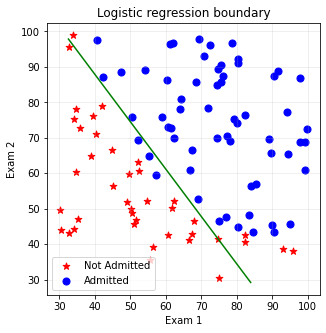

In [264]:
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X, theta_train1)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()


You'll have to adjust the above code to make it work with normalized data.

### Test set performance

Now let's apply the learned classifier to the test data we reserved in the beginning:


In [265]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [266]:
#NOTE: theta_train1 is a copy of theta values form the 1st training
#      theta_train1 is used to plot the boundary line
print('theta_train1')
print(theta_train1)

theta_train1
[[-11.29380461]
 [  0.10678604]
 [  0.07994591]]


In [267]:
y_test_pred_soft = h(X_test, theta_train1)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.6636, hard R^2 0.6931, accuracy 0.93


For classification, accuracy is probably the more useful measure of goodness of fit.

## Example 2: Loan prediction dataset

Let's take another example dataset and see what we can do with it.

This dataset is from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset).

The data concern loan applications. It has 12 independent variables, including 5 categorical variables. The dependent variable is the decision "Yes" or "No" for extending a loan to an individual who applied.

One thing we will have to do is to clean the data, by filling in missing values and converting categorical data to reals.
We will use the Python libraries pandas and sklearn to help with the data cleaning and preparation.

### Read the data and take a look

In [268]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed

import pandas as pd
import numpy as np
import random

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [269]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Handle missing values

We can see from the above table that the `Married` column has 3 missing values in the training dataset and 0 missing values in the test dataset.
Let's take a look at the distribution over the datasets then fill in the missing values in approximately the same ratio.

You may be interested to look at the [documentation of the Pandas `fillna()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). It's great!

In [270]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Now the number of examples missing the `Married` attribute is 0.

Excercise: Complete the data processing based on examples given and logistic regression model on training dataset. Estimate the Accuracy (goodness of fit) on test dataset.

In [271]:
# Another example of filling in missing values for the "number of dependents" attribute.
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Once missing values are filled in, you'll want to convert strings to numbers.

Finally, here's an example of replacing missing values for a numeric attribute. Typically, we would use the mean of the attribute over the training set. 

In [272]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


## Take-home exercise (65 points)

Using the data from Example 2 above, finish the data cleaning and
preparation. Build a logistic regression model based on the
cleaned dataset and report the accuracy on the test and training sets.

- Setup X and Y data (10 points)
- Train data and return theta and J value. Find the good $\alpha$ and you may normalized data before train. (30 points)
- Use $\theta$ and implement in test set. (10 points)
- Summarize what did you do and how to find the best result in this take home exercise. (15 points)

## To turn in

Turn in a brief report in the form of a Jupyter notebook explaining what
you did for the in-lab exercise and the take-home exercise. Discuss what
you learned in terms of normalization and data cleaning and the results
you obtained.


In [273]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Filling missing values

In [274]:
# Fill missing values - Gender
print(data_train['Gender'].value_counts())

gender = data_train['Gender'].value_counts()
print('Elements in Gender variable', gender.shape)
print('Gender ratio ', gender[0]/sum(gender.values))


def fill_gender_status(data, male_num, female_num):    
    data['Gender'].fillna('Male',inplace=True, limit = male_num )
    data['Gender'].fillna('Female',inplace=True, limit = female_num)


Male      489
Female    112
Name: Gender, dtype: int64
Elements in Gender variable (2,)
Gender ratio  0.8136439267886856


In [275]:
male_num_train = 13 * 0.8136439267886856
male_num_test = 11 * 0.8136439267886856
male_num_train, male_num_test

(10.577371048252912, 8.95008319467554)

In [276]:
male_num_train = 11
female_num_train = 13 - 11

male_num_test = 9
female_num_test = 11 - 9

print("male_num_train, female_num_train, male_num_test, female_num_test", 
      male_num_train, female_num_train, male_num_test, female_num_test)

male_num_train, female_num_train, male_num_test, female_num_test 11 2 9 2


In [277]:
fill_gender_status(data_train,male_num_train,female_num_train)
fill_gender_status(data_test,male_num_test,female_num_test)

print("Trainning:") 
print(data_train['Gender'].value_counts()) 
print("Testing:") 
print(data_test['Gender'].value_counts())
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

Trainning:
Male      500
Female    114
Name: Gender, dtype: int64
Testing:
Male      295
Female     72
Name: Gender, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [278]:
# Fill missing values - Self_Employed
print(data_train['Self_Employed'].value_counts())

self_employed = data_train['Self_Employed'].value_counts()
print('Elements in Self Employed variable', self_employed.shape)
print('Self Employed ratio ', self_employed[0]/sum(self_employed.values))

def fill_selfemployed_status(data, not_self_emp_num, self_emp_num):        
    data['Self_Employed'].fillna('No', inplace = True, limit = not_self_emp_num)
    data['Self_Employed'].fillna('Yes', inplace = True, limit = self_emp_num) 

No     500
Yes     82
Name: Self_Employed, dtype: int64
Elements in Self Employed variable (2,)
Self Employed ratio  0.8591065292096219


In [279]:
not_self_emp_num_train = 32 * 0.8591065292096219
not_self_emp_num_test = 23 * 0.8591065292096219
not_self_emp_num_train, not_self_emp_num_test

(27.491408934707902, 19.759450171821303)

In [280]:
not_self_emp_num_train = 27
self_emp_num_train = 32 -27

not_self_emp_num_test = 20
self_emp_num_test = 23 -20

print("not_self_emp_num_train, self_emp_num_train, not_self_emp_num_test, self_emp_num_test", 
      not_self_emp_num_train, self_emp_num_train, not_self_emp_num_test, self_emp_num_test)

not_self_emp_num_train, self_emp_num_train, not_self_emp_num_test, self_emp_num_test 27 5 20 3


In [281]:
fill_selfemployed_status(data_train,not_self_emp_num_train,self_emp_num_train)
fill_selfemployed_status(data_test,not_self_emp_num_test,self_emp_num_test)

print("Trainning:") 
print(data_train['Self_Employed'].value_counts()) 
print("Testing:") 
print(data_test['Self_Employed'].value_counts())
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

Trainning:
No     527
Yes     87
Name: Self_Employed, dtype: int64
Testing:
No     327
Yes     40
Name: Self_Employed, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [282]:
# Fill missing values - Loan_Amount_Term

print(data_train['Loan_Amount_Term'].value_counts())

train_loan_amount_term_mean = np.mean(data_train["Loan_Amount_Term"])

#data_train['Loan_Amount_Term'].fillna(train_loan_amount_term_mean, inplace=True, limit = 5)
#data_test['Loan_Amount_Term'].fillna(train_loan_amount_term_mean, inplace=True, limit = 5)
data_train['Loan_Amount_Term'].fillna(train_loan_amount_term_mean, inplace=True, limit = 15)
data_test['Loan_Amount_Term'].fillna(train_loan_amount_term_mean, inplace=True, limit = 10)


print("Trainning:") 
print(data_train['Loan_Amount_Term'].value_counts()) 
print("Testing:") 
print(data_test['Loan_Amount_Term'].value_counts())
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Trainning:
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Testing:
360.0    311
180.0     22
480.0      8
300.0      7
342.0      6
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
---------------

In [283]:
# Fill missing values - Credit_History

print(data_train['Credit_History'].value_counts())

credit_history = data_train['Credit_History'].value_counts()
print('Elements in Credit_History variable', credit_history.shape)
print('Credit_History ratio ', credit_history[1]/sum(credit_history.values))


def fill_credit_history_status(data, credit_history_one_num, credit_history_zero_num):    
    data['Credit_History'].fillna(1.0,inplace=True, limit = credit_history_one_num )
    data['Credit_History'].fillna(0.0,inplace=True, limit = credit_history_zero_num)

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Elements in Credit_History variable (2,)
Credit_History ratio  0.8421985815602837


In [284]:
credit_history_one_num_train = 50 * 0.8421985815602837
credit_history_one_num_test = 29 * 0.8421985815602837
credit_history_one_num_train, credit_history_one_num_test

(42.10992907801418, 24.423758865248228)

In [285]:
credit_history_one_num_train = 42
credit_history_zero_num_train = 50 - 42

credit_history_one_num_test = 24
credit_history_zero_num_test = 29 -24

print("credit_history_one_num_train, credit_history_zero_num_train, credit_history_one_num_test, credit_history_zero_num_test", 
      credit_history_one_num_train, credit_history_zero_num_train, credit_history_one_num_test, credit_history_zero_num_test)

credit_history_one_num_train, credit_history_zero_num_train, credit_history_one_num_test, credit_history_zero_num_test 42 8 24 5


In [286]:
fill_credit_history_status(data_train,credit_history_one_num_train,credit_history_zero_num_train)
fill_credit_history_status(data_test,credit_history_one_num_test,credit_history_zero_num_test)

print("Trainning:") 
print(data_train['Credit_History'].value_counts()) 
print("Testing:") 
print(data_test['Credit_History'].value_counts())
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

Trainning:
1.0    517
0.0     97
Name: Credit_History, dtype: int64
Testing:
1.0    303
0.0     64
Name: Credit_History, dtype: int64
Missing values for train data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


### Converting categorical data to reals

In [287]:
print("Trainning\n-----------")
print(data_train.info(),"\n")
print("Testing\n-----------")
print(data_test.info(),"\n")


Trainning
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None 

Testing
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 

In [288]:
# Converting type - Gender
data_train['Gender'].replace('Male', 0, inplace = True)
data_train['Gender'].replace('Female', 1, inplace = True)

data_test['Gender'].replace('Male', 0, inplace = True)
data_test['Gender'].replace('Female', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Gender'])
print("Testing:") 
print(data_test.dtypes['Gender'])

Trainning:
int64
Testing:
int64


In [289]:
# Converting type - Married
data_train['Married'].replace('No', 0, inplace = True)
data_train['Married'].replace('Yes', 1, inplace = True)

data_test['Married'].replace('No', 0, inplace = True)
data_test['Married'].replace('Yes', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Married'])
print("Testing:") 
print(data_test.dtypes['Married'])

Trainning:
int64
Testing:
int64


In [290]:
# Converting type - Dependents
data_train['Dependents'] = data_train['Dependents'].astype(int)

data_test['Dependents'] = data_test['Dependents'].astype(int)

print("Trainning:") 
print(data_train.dtypes['Dependents'])
print("Testing:") 
print(data_test.dtypes['Dependents'])


Trainning:
int64
Testing:
int64


In [291]:
# Converting type - Education
data_train['Education'].replace('Not Graduate', 0, inplace = True)
data_train['Education'].replace('Graduate', 1, inplace = True)

data_test['Education'].replace('Not Graduate', 0, inplace = True)
data_test['Education'].replace('Graduate', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Education'])
print("Testing:") 
print(data_test.dtypes['Education'])

Trainning:
int64
Testing:
int64


In [292]:
# Converting type - Self_Employed
data_train['Self_Employed'].replace('No', 0, inplace = True)
data_train['Self_Employed'].replace('Yes', 1, inplace = True)

data_test['Self_Employed'].replace('No', 0, inplace = True)
data_test['Self_Employed'].replace('Yes', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Self_Employed'])
print("Testing:") 
print(data_test.dtypes['Self_Employed'])

Trainning:
int64
Testing:
int64


In [293]:
# Converting type - Property_Area
print("Trainning:") 
print(data_train['Property_Area'].value_counts()) 
print("Testing:") 
print(data_test['Property_Area'].value_counts())

Trainning:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Testing:
Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64


In [294]:
data_train['Property_Area'].replace('Urban', 0, inplace = True)
data_train['Property_Area'].replace('Semiurban', 1, inplace = True)
data_train['Property_Area'].replace('Rural', 2, inplace = True)

data_test['Property_Area'].replace('Urban', 0, inplace = True)
data_test['Property_Area'].replace('Semiurban', 1, inplace = True)
data_test['Property_Area'].replace('Rural', 2, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Property_Area'])
print("Testing:") 
print(data_test.dtypes['Property_Area'])

Trainning:
int64
Testing:
int64


In [295]:
# Converting type - Loan_Status
data_train['Loan_Status'].replace('N', 0, inplace = True)
data_train['Loan_Status'].replace('Y', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Loan_Status'])

Trainning:
int64


### Extracting X and y

In [296]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [297]:
X = data_train.iloc[:,1:12].to_numpy()
y = data_train.iloc[:,-1].to_numpy()
m,n = X.shape
y = y.reshape(m,1)

print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (614, 11)
y.shape (614, 1)


### Normalizing the data

In [298]:
X = (X-np.mean(X, axis = 0))/np.std(X, axis = 0)

### Functions used in logistic regression

In [299]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0] 
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad #grad_j use y-h not h-y so addition
        j_history.append(cost)
    return theta, j_history

def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

### Training the model

In [300]:
n = X.shape[1]
X = np.insert(X, 0, 1, axis=1)

# Declare alpha
alpha = .01

# Initialize theta
theta_initial = np.zeros((n+1, 1))                       

# Number of iterations
num_iters = 100000

theta, j_history = train(X, y, theta_initial, alpha, num_iters)

In [301]:
print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[ 0.8446039 ]
 [ 0.08011228]
 [ 0.29224497]
 [ 0.00915213]
 [ 0.16006128]
 [ 0.00748863]
 [ 0.05631074]
 [-0.09899958]
 [-0.14642949]
 [-0.04844197]
 [ 1.21192517]
 [-0.06243402]]
Cost with optimized theta: 0.4787865901028924


### Plot graph

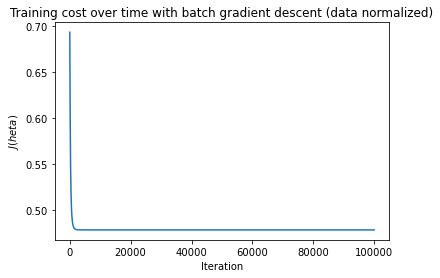

In [302]:
import matplotlib.pyplot as plt

plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (data normalized)")
plt.show()

### Accuracy evaluation - Part 1 - Based on only the training dataset
- **NOTE - Since the data_test has no 'Loan_Status' variable, this accuracy evaluation is based on the tainning dataset itself.**

In [303]:
y_test_pred_soft = h(X, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y, y_test_pred_soft)
test_rsq_hard = r_squared(y, y_test_pred_hard)
test_acc = (y_test_pred_hard == y).astype(int).sum() / y.shape[0]

print('Soft R^2 = ', test_rsq_soft)
print('Hard R^2 = ', test_rsq_hard)
print('Test accuracy = ',test_acc)

Soft R^2 =  0.29316999885885786
Hard R^2 =  0.09821781200631918
Test accuracy =  0.8061889250814332


### Accuracy evaluation - Part 2 - Split data_train into train and test datasets and evaluate accuracy.

In [304]:
import random

# Split the dataset into trainning and testing samples

m, n = X.shape
idx = np.arange(0, m)
random.seed(1234)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = X[train_idx,:];
X_test = X[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(368, 12) (246, 12) (368, 1) (246, 1)


In [305]:
# Declare alpha
alpha = .01

# Initialize theta
theta_initial = np.zeros((n, 1))                       

# Number of iterations
num_iters = 100000

#X = np.insert(X, 0, 1, axis=1) ---> done previously
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)
print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[ 0.83610092]
 [ 0.08450087]
 [ 0.30379077]
 [ 0.04384071]
 [ 0.10637746]
 [ 0.07076784]
 [-0.05533225]
 [-0.18214022]
 [-0.18955915]
 [ 0.0924006 ]
 [ 1.29108952]
 [-0.2137548 ]]
Cost with optimized theta: 0.472006061570789


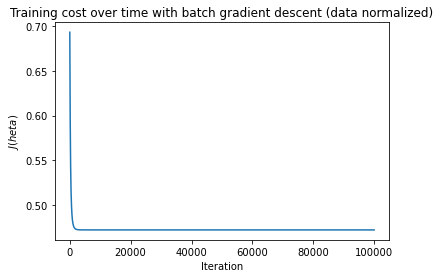

In [306]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (data normalized)")
plt.show()

In [307]:
y_test_pred_soft = h(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Soft R^2 = ', test_rsq_soft)
print('Hard R^2 = ', test_rsq_hard)
print('Test accuracy = ',test_acc)

Soft R^2 =  0.26082727381972115
Hard R^2 =  0.08606811145510862
Test accuracy =  0.8048780487804879


### Discussion

- Following are the steps I followed in this execise to implement Logistic Regression model on the loan prediction dataset

#### Filling missing values
- After loading the data, for each variable in the dataset, missing values were filled. 
- In the case of non-numerical and discrete variables, the ratio of each category was computed and missing values were filled based on these ratios.
- In the case of numerical attributes, the missing values were filled based on a numerical representation of the sample such as the mean.
- To prevent data leakage, always I infer information necessary to fill the missing values only from the training dataset.
- Filling missing values is important since machine learning models will result in errors without this step (Example: a missing value can lead to runtime errors such as division-by-zero ).

#### Converting categorical data to numerical values
- As the 2nd step of the experiment, I converted the categorical attributes (datatype 'object') into numerical data types such as int64 and float64. Unless we perform this step our data cannot be normalized and result in problems such as high fluctuation in cost during training and training costs not converging even after a large number of iterations.

#### Normalizing the data
- Generally, normalization input data features lead to a better result. As explained in the previous step this step is important for the training cost to converge smoothly. Further, if we do not normalize the data we cannot compare the accuracy between different machine learning algorithms.

#### Extract X, y and train the model
- From the normalized data independent variables were extracted to X and the dependent variable was extracted to y. 
- Next,the model was trained using the Logistic Regression algorithm.

#### Evaluation of the accuracy
- In this step, I evaluated the 'Goodness of fit' of the resulting model.
- **Part 1** - In the 1st training session, since the `data_test` has no 'Loan_Status' variable, the accuracy evaluation was done based on the training dataset itself. Results of the first experiment:
    - Soft $R^2$ =  0.29316999885885786
    - Hard $R^2$ =  0.09821781200631918
    - Test accuracy =  0.8061889250814332
- **Part 2** - In the 2nd training session, `data_train` was split into train and test datasets. The model has been trained again. Results of the second experiment:
    - Soft $R^2$ =  0.26082727381972115
    - Hard $R^2$ =  0.08606811145510862
    - Test accuracy =  0.8048780487804879   

